# Assignment 2 Question 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import math
import seaborn as sns
import geopandas
from scipy import stats
from matplotlib.pyplot import figure

First we load in our cleaned dataset from previous questions

In [2]:
df = pd.read_csv('cleaned.csv')

df_test = pd.read_csv('cleaned.csv')

#Removing rows with missing values
my_list = df['trip_duration'].values.tolist()
indices = [i for i, x in enumerate(my_list) if x == " "]
df = df.drop(indices)

df_test = df.copy()

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,1.498521,11.856428,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,1.805507,9.803659,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,6.385098,10.822201,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,1.485498,12.465721,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,1.188588,9.836594,Saturday


Here we also want to remove locational outliers so geopandas can place locations correctly. We remove all points which don't fit within the boundaries of the shapefile we are going to use later

In [3]:

outlier = df.drop(df[(df.pickup_longitude < -74.255591)].index)
outlier = outlier.drop(outlier[(outlier.pickup_longitude > -73.700009)].index)
outlier = outlier.drop(outlier[(outlier.pickup_latitude < 40.496133)].index)
outlier = outlier.drop(outlier[(outlier.pickup_latitude > 40.915532)].index)

outlier = outlier.drop(outlier[(outlier.dropoff_longitude < -74.255591)].index)
outlier = outlier.drop(outlier[(outlier.dropoff_longitude > -73.700009)].index)
outlier = outlier.drop(outlier[(outlier.dropoff_latitude < 40.496133)].index)
outlier = outlier.drop(outlier[(outlier.dropoff_latitude > 40.915532)].index)



outlier


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,1.498521,11.856428,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,1.805507,9.803659,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,6.385098,10.822201,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,1.485498,12.465721,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,1.188588,9.836594,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,0.216111,1.225080,5.668751,Friday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,0.181944,6.049836,33.251005,Sunday
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,0.212222,7.824606,36.869870,Friday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,0.103611,1.092564,10.544853,Tuesday


In [4]:
vendors = outlier[['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']]
vendors

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,764
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373


Since we are interested in vendors, here we will seperate our data into the two different vendors so we can visualize appropriately

In [5]:
vendor1 = vendors.loc[df['vendor_id'] == 1]
vendor1

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663
6,1,4,-73.969017,40.757839,-73.957405,40.765896,341
8,1,1,-73.999481,40.738400,-73.985786,40.732815,255
15,1,1,-73.955513,40.768593,-73.948761,40.771545,211
17,1,1,-73.994255,40.745804,-73.999657,40.723343,731
...,...,...,...,...,...,...,...
1458634,1,2,-73.989075,40.730465,-73.963882,40.773739,972
1458637,1,1,-73.975357,40.751705,-73.949478,40.776764,760
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373


In [6]:
vd1p = geopandas.GeoDataFrame(vendor1, geometry=geopandas.points_from_xy(vendor1.pickup_longitude, vendor1.pickup_latitude))
vd1d = geopandas.GeoDataFrame(vendor1, geometry=geopandas.points_from_xy(vendor1.dropoff_longitude, vendor1.dropoff_latitude))

In [7]:
vd1p.crs = "EPSG:4326"
vd1p.crs

'EPSG:4326'

In [8]:
points = vd1p.geometry
pointsd = vd1d.geometry


In [9]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

We plot the points our first vendor picks up from on a map of new york city

D:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

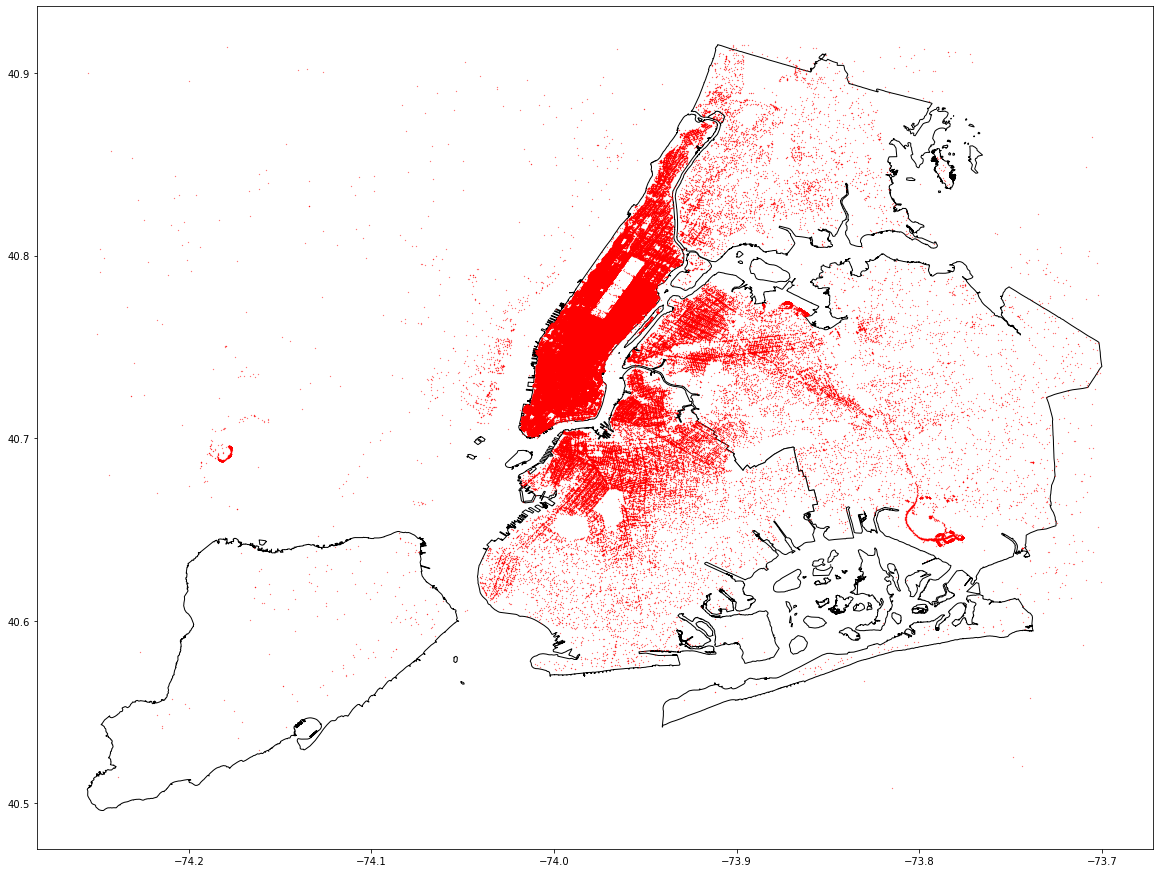

In [10]:

maps = geopandas.read_file(geopandas.datasets.get_path('nybb'))
maps = maps.to_crs("EPSG:4326")
ax = maps.plot(color='white', edgecolor='black',figsize = (20,20))
points.plot(ax=ax, color='red',markersize = 0.05)


We also want to visualize our dropoffs for vendor 1

D:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

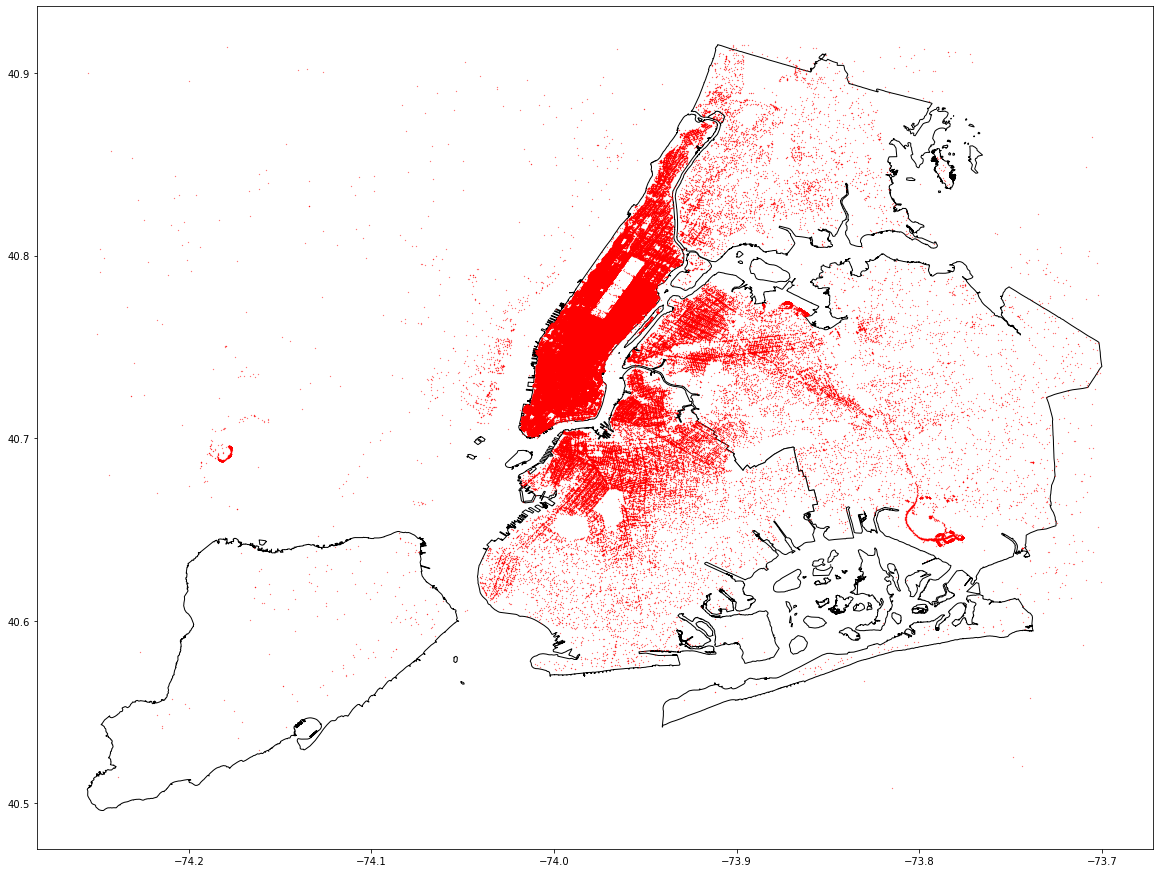

In [11]:
maps = geopandas.read_file(geopandas.datasets.get_path('nybb'))
maps = maps.to_crs("EPSG:4326")
ax = maps.plot(color='white', edgecolor='black',figsize = (20,20))
pointsd.plot(ax=ax, color='red',markersize = 0.05)

We now do the same for pickups and dropoffs for vendor 2

In [12]:
vendor2 = vendors.loc[df['vendor_id'] == 2]
vendor2

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435
7,2,1,-73.969276,40.797779,-73.922470,40.760559,1551
...,...,...,...,...,...,...,...
1458632,2,2,-74.015572,40.710892,-73.996620,40.743633,777
1458635,2,1,-73.985390,40.763020,-73.989708,40.767502,237
1458636,2,1,-73.863815,40.769684,-73.864395,40.761326,800
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778


In [13]:
vd2p = geopandas.GeoDataFrame(vendor2, geometry=geopandas.points_from_xy(vendor2.pickup_longitude, vendor2.pickup_latitude))
vd2pd = geopandas.GeoDataFrame(vendor2, geometry=geopandas.points_from_xy(vendor2.dropoff_longitude, vendor2.dropoff_latitude))


In [14]:
points2 = vd2p.geometry
points2d = vd2pd.geometry
points2

0          POINT (-73.96463 40.76560)
2          POINT (-74.00533 40.71009)
3          POINT (-74.01227 40.70672)
4          POINT (-73.97292 40.78252)
7          POINT (-73.92247 40.76056)
                      ...            
1458632    POINT (-73.99662 40.74363)
1458635    POINT (-73.98971 40.76750)
1458636    POINT (-73.86440 40.76133)
1458639    POINT (-73.99491 40.74017)
1458641    POINT (-74.00443 40.70737)
Name: geometry, Length: 653748, dtype: geometry

Pickups for vendor 2

D:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

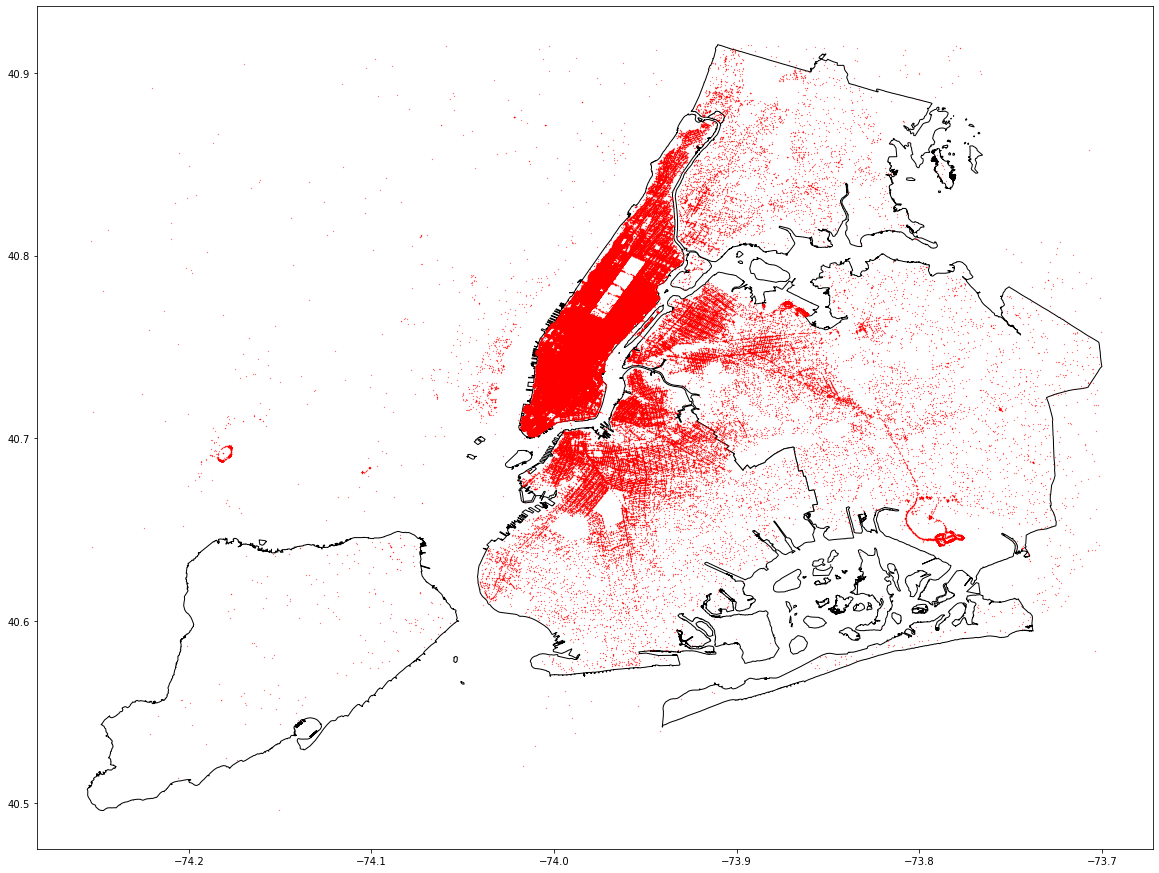

In [15]:
maps = geopandas.read_file(geopandas.datasets.get_path('nybb'))
maps = maps.to_crs("EPSG:4326")
ax = maps.plot(color='white', edgecolor='black',figsize = (20,20))
points2.plot(ax=ax, color='red',markersize = 0.05)

Dropoffs for vendor 2

D:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

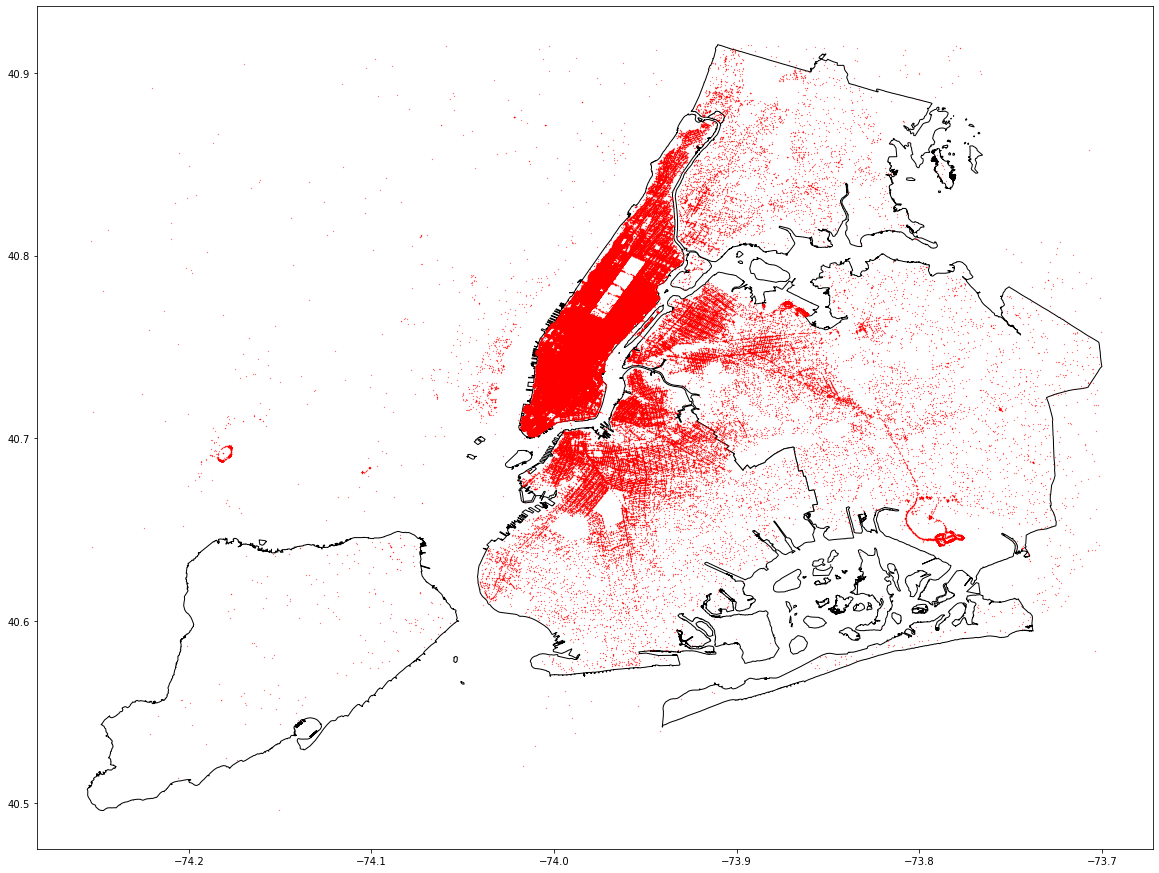

In [16]:
maps = geopandas.read_file(geopandas.datasets.get_path('nybb'))
maps = maps.to_crs("EPSG:4326")
ax = maps.plot(color='white', edgecolor='black',figsize = (20,20))
points2d.plot(ax=ax, color='red',markersize = 0.05)

## Passenger numbers and Duration

We now want do visualize passenger numbers and Durations

Vendor 1

Text(0.5, 0, 'Passenger Numbers')

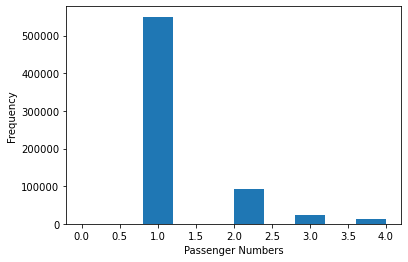

In [17]:
vd1pc = vd1p.passenger_count
vd1pcpn = vd1pc.plot.hist(bins = 10)
vd1pcpn.set_xlabel("Passenger Numbers")

Vendor 2

Text(0.5, 0, 'Passenger Numbers')

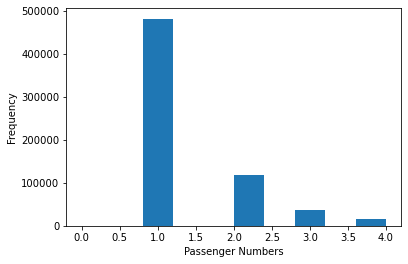

In [18]:
vd2pc = vd2p.passenger_count
vd2pcpn = vd2pc.plot.hist(bins = 10)
vd2pcpn.set_xlabel("Passenger Numbers")

There isn't too much discrepancy betweeen the amount of passengers per vendor, we can't really tell them apart from these two visualizations. Though, we can see that vendor 1 has a higher number of overall passengers over vendor 2. Given green taxis have been on the rise in popularity and 2/3rds of yellow taxis were even taken off the roads in 2021, we are inclined to lean towards vendor 1 being green taxis.

### Trip durations

Before we calculate trip durations we remove outliers via quartiles

In [19]:
vd1pd = vd1p.trip_duration
vd1pd
#vd2pd[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

1          663
6          341
8          255
15         211
17         731
          ... 
1458634    972
1458637    760
1458640    655
1458642    373
1458643    198
Name: trip_duration, Length: 677185, dtype: int64

In [20]:
#vd2pd.plot.hist(bins = 10)
Q1 = vd1pd.quantile(0.25)
Q3 = vd1pd.quantile(0.75)
IQR = Q3 - Q1

vd1pdo = vd1pd[~((vd1pd < (Q1 - 1.5 * IQR)) |(vd1pd > (Q3 + 1.5 * IQR)))]
vd1pdo

1          663
6          341
8          255
15         211
17         731
          ... 
1458634    972
1458637    760
1458640    655
1458642    373
1458643    198
Name: trip_duration, Length: 644058, dtype: int64

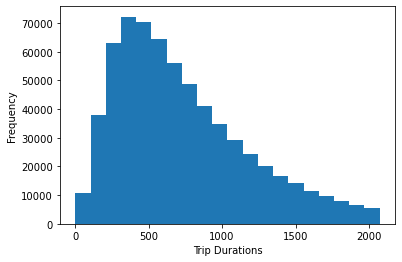

In [21]:
vd1pdop = vd1pdo.plot.hist(bins = 20)
vd1pdopg = vd1pdop.set_xlabel("Trip Durations")


In [22]:
vd2pd = vd2p.trip_duration
vd2pd
#vd2pd[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

0           455
2          2124
3           429
4           435
7          1551
           ... 
1458632     777
1458635     237
1458636     800
1458639     778
1458641     764
Name: trip_duration, Length: 653748, dtype: int64

In [23]:
#vd2pd.plot.hist(bins = 10)
Q12 = vd2pd.quantile(0.25)
Q32 = vd2pd.quantile(0.75)
IQR2 = Q32 - Q12

vd2pdo = vd2pd[~((vd2pd < (Q12 - 1.5 * IQR)) |(vd2pd > (Q32 + 1.5 * IQR2)))]
vd2pdo

0           455
3           429
4           435
7          1551
9          1225
           ... 
1458632     777
1458635     237
1458636     800
1458639     778
1458641     764
Name: trip_duration, Length: 619714, dtype: int64

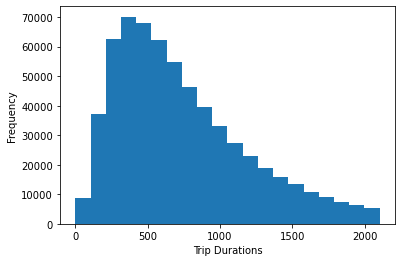

In [24]:
vd2pdopg = vd2pdo.plot.hist(bins = 20)
vd2pdopg = vd2pdopg.set_xlabel("Trip Durations")

In [25]:
vd1pdo.mean()

727.2309776448704

In [26]:
vd2pdo.mean()

734.8646246494351

Our trip means and durations across both vendors are almost identical, we cannot really ascertain any difference here

Ideally our geoplots should be able to tell us which vendor is which since green taxis are not allowed to hail at jfk airport as well as in the greater city district. But we can hardly see any difference in the plots. This is possible because the taxis might not necessarily follow the hail rules.